In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('data/ronaldo_messi_stats.csv')

In [5]:
df

,clubr,age,mpr,gsr,astr,mpm,gsm,astm
0,Manchester United,19,40,6,7,25,8,3
1,Manchester United,20,50,9,8,36,17,3
2,Manchester United,21,47,12,8,40,16,13
3,Manchester United,22,53,23,15,51,38,17
4,Manchester United,23,49,42,7,53,47,11
5,Manchester United,24,53,26,9,55,53,23
6,Real Madrid,25,35,33,7,60,73,29
7,Real Madrid,26,54,53,15,50,60,15
8,Real Madrid,27,55,60,15,46,41,14
9,Real Madrid,28,55,55,12,57,58,27


Goals scored per season for club with age.

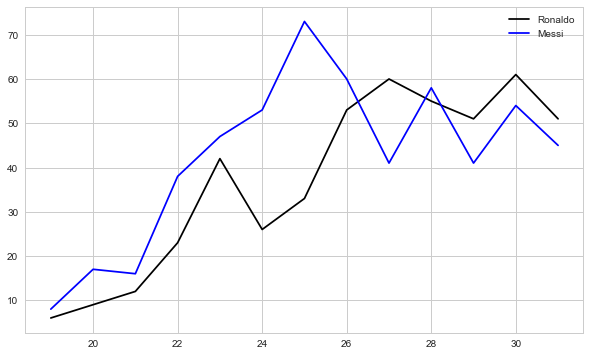

In [15]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['gsr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['gsm'], c = 'blue', label='Messi')
plt.legend()

Goals scored per match per season for club with age.

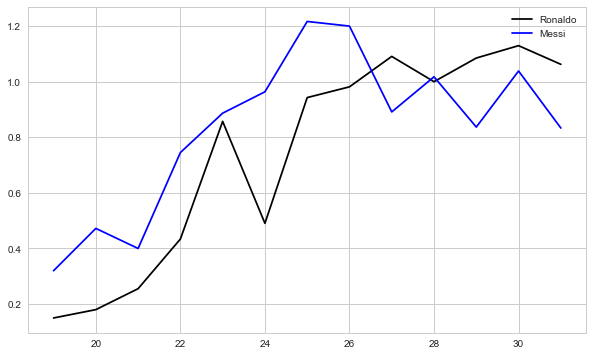

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['gsr']/df['mpr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['gsm']/df['mpm'], c = 'blue', label='Messi')
plt.legend()

Assists provided per season for club with age.

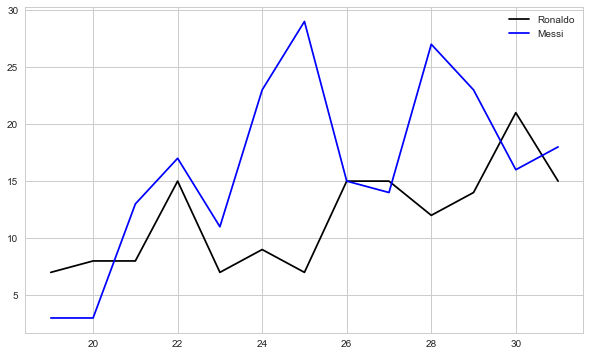

In [17]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['astr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['astm'], c = 'blue', label='Messi')
plt.legend()

Assists provided per match per season for club with age.

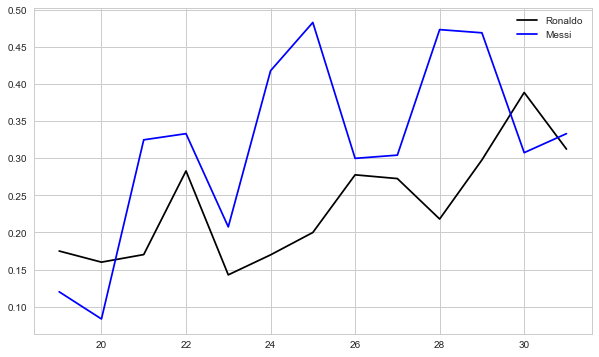

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df['age'], df['astr']/df['mpr'], c = 'black', label='Ronaldo')
plt.plot(df['age'], df['astm']/df['mpm'], c = 'blue', label='Messi')
plt.legend()

Ronaldo was always behind Messi in goals and assists while in Manchester United. But he has significantly reduced the gap.

In [20]:
def bootstrap_mean_diff(x, y):
    meanx = np.mean(np.random.choice(x, size=len(x)))
    meany = np.mean(np.random.choice(y, size=len(y)))
    return meany - meanx

In [21]:
#Manchester United dataset
mu_df = df[df['clubr'] == "Manchester United"]
#Real Madrid dataset
rm_df = df[df['clubr'] == "Real Madrid"]

In [55]:
mu_gs_replicates = np.empty(10000)
rm_gs_replicates = np.empty(10000)

ronaldo_mu_ratio = mu_df['gsr']/mu_df['mpr']
ronaldo_mu_mean = ronaldo_mu_ratio.mean()
ronaldo_rm_ratio = rm_df['gsr']/rm_df['mpr']
ronaldo_rm_mean = ronaldo_rm_ratio.mean()

messi_mu_ratio = mu_df['gsm']/mu_df['mpm']
messi_mu_mean = messi_mu_ratio.mean()
messi_rm_ratio = rm_df['gsm']/rm_df['mpm']
messi_rm_mean = messi_rm_ratio.mean()

mu_gs_mean_diff = messi_mu_mean - ronaldo_mu_mean
rm_gs_mean_diff = messi_rm_mean - ronaldo_rm_mean

In [56]:
# Shift means for hypothesis testing that both Roanldo and Messi have same average goals per game ratio.
ronaldo_messi_mu_ratio = np.concatenate([ronaldo_mu_ratio, messi_mu_ratio])
ronaldo_messi_rm_ratio = np.concatenate([ronaldo_rm_ratio, messi_rm_ratio])
ronaldo_messi_mu_mean = ronaldo_messi_mu_ratio.mean()
ronaldo_messi_rm_mean = ronaldo_messi_rm_ratio.mean()

ronaldo_mu_ratio_shifted = ronaldo_mu_ratio - ronaldo_mu_mean + ronaldo_messi_mu_mean
messi_mu_ratio_shifted = messi_mu_ratio - messi_mu_mean + ronaldo_messi_mu_mean

ronaldo_rm_ratio_shifted = ronaldo_rm_ratio - ronaldo_rm_mean + ronaldo_messi_rm_mean
messi_rm_ratio_shifted = messi_rm_ratio - messi_rm_mean + ronaldo_messi_rm_mean

In [57]:
for i in range(10000):
    temp_diff_mu = bootstrap_mean_diff(ronaldo_mu_ratio_shifted, messi_mu_ratio_shifted)
    mu_gs_replicates[i] = temp_diff_mu
    temp_diff_rm = bootstrap_mean_diff(ronaldo_rm_ratio_shifted, messi_rm_ratio_shifted)
    rm_gs_replicates[i] = temp_diff_rm

In [63]:
mu_gs_mean_diff

0.23679312832310673

In [64]:
rm_gs_mean_diff

-0.03691989829168141

In [60]:
np.sum(mu_gs_replicates >= mu_gs_mean_diff) / 10000

0.044999999999999998

So, with significance level of 0.05, Messi had significantly better goals per game ratio in Ronaldo MU age era.

In [65]:
np.sum(rm_gs_replicates < rm_gs_mean_diff) / 10000

0.28620000000000001

No significant difference between goals per game ratio between Ronaldo and Messi in Ronaldo RM era.

##### Thus joining Real Madrid has helped increase Ronaldo's goalscoring rate.

In [67]:
ronaldo_gs_mu_rm_replicates = np.empty(10000)

In [73]:
ronaldo_mu_rm_diff_mean = ronaldo_rm_mean - ronaldo_mu_mean
ronaldo_mu_rm_diff_mean

0.6472850050327541

In [70]:
ronaldo_rm_shifted = ronaldo_rm_ratio - ronaldo_rm_mean + (df['gsr']/df['mpr']).mean()
ronaldo_mu_shifted = ronaldo_mu_ratio - ronaldo_mu_mean + (df['gsr']/df['mpr']).mean()

In [71]:
for i in range(10000):
    temp = bootstrap_mean_diff(ronaldo_mu_shifted, ronaldo_rm_shifted)
    ronaldo_gs_mu_rm_replicates[i] = temp

In [72]:
np.sum(ronaldo_gs_mu_rm_replicates >= ronaldo_mu_rm_diff_mean) / 10000

0.0

##### Ronaldo's goalscoring rate has been improved significantly after joining Real Madrid with almost 100% confidence interval.